<a href="https://colab.research.google.com/github/jhonatanalfred7/ScriptPythonML/blob/main/RegresionLogistica_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib.pyplot as plt 
#plt.rc("font", size=14)  #Change the font size on a matplotlib plot

import seaborn as sns
#sns.set(style="white") #white background style for seaborn plots
#sns.set(style="whitegrid", color_codes=True)

import warnings
#warnings.simplefilter(action='ignore')

In [8]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv(r'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')
# Read CSV test data file into DataFrame
test_df = pd.read_csv(r'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/test.csv')

In [12]:
print(train_df.shape)
print(test_df.shape)

(891, 11)
(418, 10)


In [15]:
train_df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [24]:
train_df['age'].isnull().sum()/train_df.shape[0]* 100

19.865319865319865

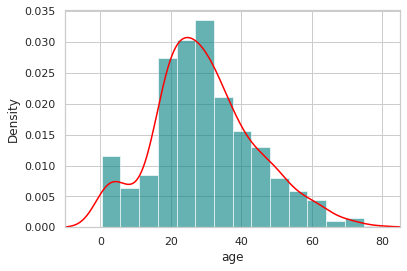

In [42]:
# #bins:   n = number of observations = 100
         # Range = maximum value – minimum value = 91 – 1 = 90
         # of intervals =  √n = √100 = 10
         # Width of intervals =  Range / (# of intervals) = 90/10 = 9
                               
ax = train_df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["age"].plot(kind='density', color='red')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

In [44]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [46]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [48]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: embarked, dtype: int64


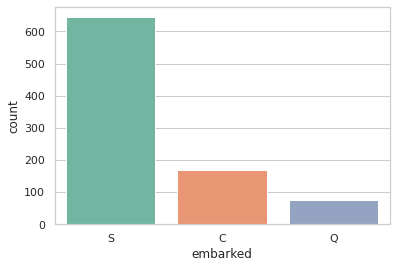

In [50]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['embarked'].value_counts())
#s.value_counts(dropna=False)
sns.countplot(x='embarked', data=train_df, palette='Set2')
plt.show()

In [62]:
print('The most common boarding port of embarkation is %s.' %train_df['embarked'].value_counts().idxmax())


The most common boarding port of embarkation is S.


2.4. Ajustes finales a los datos (entrenamiento y prueba)
Según mi evaluación de los valores faltantes en el conjunto de datos, haré los siguientes cambios en los datos:



*   Si falta "Edad" para una fila determinada, lo imputaré con 28 (edad media).
*   Si "Embarked" falta para una fila dividida, lo imputaré con "S" (el puerto de embarque más común).
*   Ignoraré "Cabin" como variable. Hay demasiados valores perdidos para la imputación. Según la información disponible, parece que este valor está asociado con la clase del pasajero y la tarifa pagada.

In [66]:
train_data = train_df.copy()
train_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
train_data["embarked"].fillna(train_df['embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('cabin', axis=1, inplace=True)
print(train_data.isnull().sum())
print(train_data.head())

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64
   survived  pclass  ...     fare embarked
0         0       3  ...   7.2500        S
1         1       1  ...  71.2833        C
2         1       3  ...   7.9250        S
3         1       1  ...  53.1000        S
4         0       3  ...   8.0500        S

[5 rows x 10 columns]


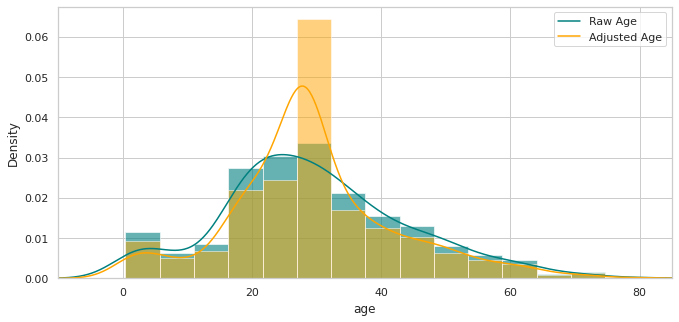

In [74]:
plt.figure(figsize=(11,5)) #15,8
ax = train_df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["age"].plot(kind='density', color='teal')

ax = train_data["age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["age"].plot(kind='density', color='orange')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

Según el diccionario de datos de Kaggle, tanto SibSp como Parch se relacionan con viajar con la familia. En aras de la simplicidad (y para tener en cuenta la posible multicolinealidad), combinaré el efecto de estas variables en un predictor categórico: si ese individuo viajaba solo o no.

In [78]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["sibsp"]+train_data["parch"])>0, 0, 1)
train_data.drop('sibsp', axis=1, inplace=True)
train_data.drop('parch', axis=1, inplace=True)

In [87]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["pclass","embarked","sex"])
#training.drop('Sex_female', axis=1, inplace=True)
#training.drop('PassengerId', axis=1, inplace=True)
#training.drop('Name', axis=1, inplace=True)
#training.drop('Ticket', axis=1, inplace=True)
training.drop(['sex_female','name','ticket'],axis = 1,inplace = True)
final_train = training
final_train.head(1)

,survived,age,fare,TravelAlone,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_male
0,0,22.0,7.25,0,0,0,1,0,0,1,1


**Ahora, aplique los mismos cambios a los datos de prueba.**

Solicitaré la misma imputación de "Edad" en los datos de la prueba que hice para mis datos de entrenamiento (si faltan, Edad = 28).
También eliminaré la variable "Cabina" de los datos de prueba, ya que he decidido no incluirla en mi análisis.
No faltaban valores en la variable de puerto "Embarked".
Agregaré las variables ficticias para finalizar el conjunto de prueba.
Finalmente, imputaré el valor 1 faltante de "Tarifa" con la mediana, 14,45.

In [89]:
test_df.isnull().sum()

pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

In [93]:
test_data = test_df.copy()
test_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
test_data["fare"].fillna(train_df["fare"].median(skipna=True), inplace=True)
test_data.drop('cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["sibsp"]+test_data["parch"])>0, 0, 1)
test_data.drop(['sibsp','parch'], axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["pclass","embarked","sex"])
testing.drop(['sex_female','name','ticket'], axis=1, inplace=True)

final_test = testing
final_test.head()

,age,fare,TravelAlone,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# **3. Exploratory Data Analysis**


## **3.1. Exploration of Age**

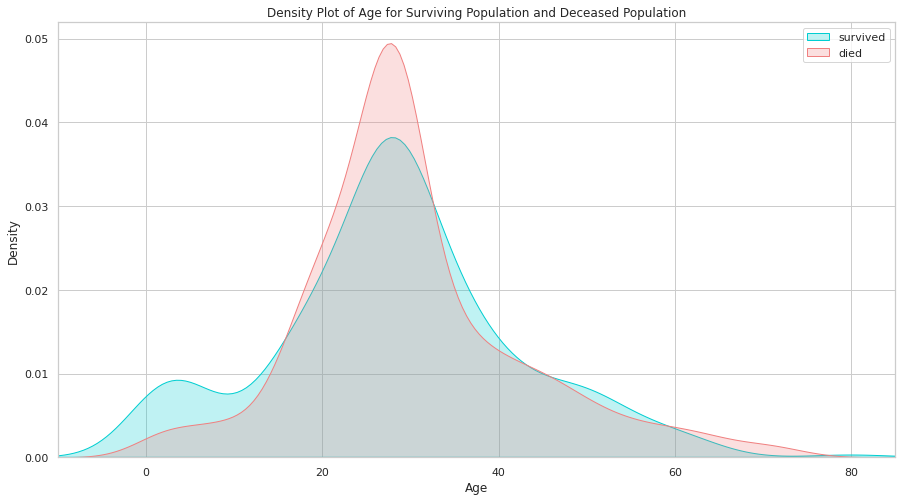

In [95]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train["age"][final_train.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["age"][final_train.survived == 0], color="lightcoral", shade=True)

plt.legend(['survived', 'died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

La distribución por edades de supervivientes y fallecidos es en realidad muy similar. Una diferencia notable es que, de los supervivientes, una mayor proporción eran niños. Evidentemente, los pasajeros intentaron salvar a los niños dándoles un lugar en las balsas salvavidas.

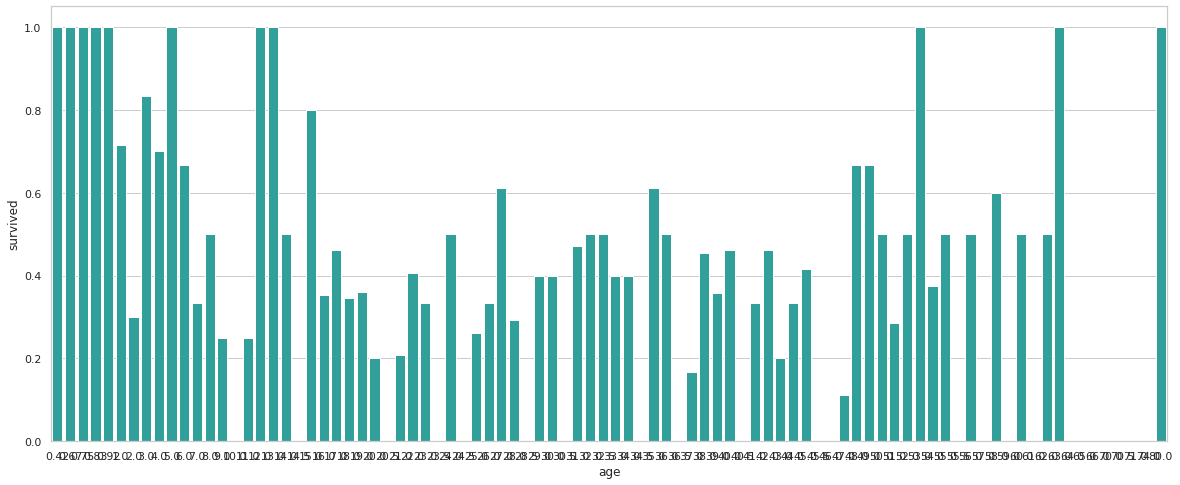

In [99]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["age", "survived"]].groupby(['age'], as_index=False).mean()
g = sns.barplot(x='age', y='survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [104]:
final_train['IsMinor']=np.where(final_train['age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['age']<=16, 1, 0)

## **3.2. Exploration of Fare**

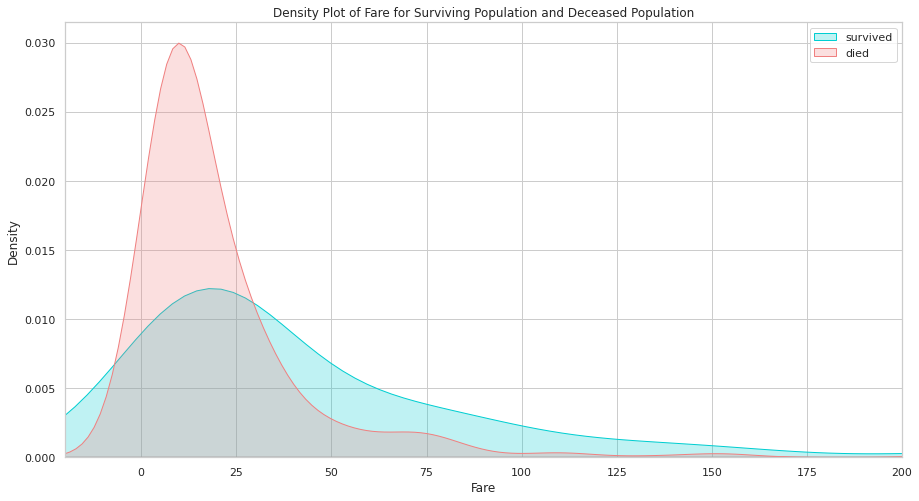

In [106]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train["fare"][final_train.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["fare"][final_train.survived == 0], color="lightcoral", shade=True)
plt.legend(['survived', 'died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

Como las distribuciones son claramente diferentes para las tarifas de los sobrevivientes frente a las de los fallecidos, es probable que esto sea un predictor significativo en nuestro modelo final. Los pasajeros que pagaron una tarifa más baja parecen haber tenido menos probabilidades de sobrevivir. Esto probablemente esté fuertemente correlacionado con la Clase de Pasajero, que veremos a continuación.

## **3.3. Exploration of Passenger Class**

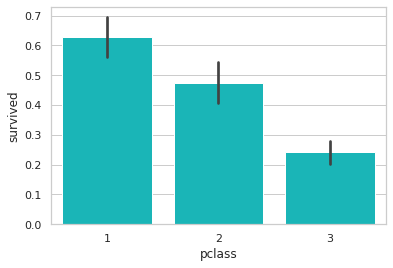

In [111]:
sns.barplot('pclass', 'survived', data=train_df, color="darkturquoise")
plt.show()

## **3.4. Exploration of Embarked Port**

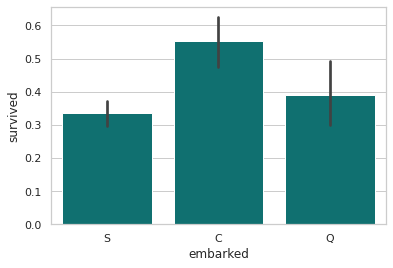

In [113]:
sns.barplot('embarked', 'survived', data=train_df, color="teal")
plt.show()

**3.5. Exploration of Traveling Alone vs. With Family**

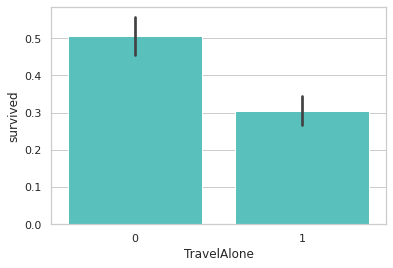

In [114]:
sns.barplot('TravelAlone', 'survived', data=final_train, color="mediumturquoise")
plt.show()

**3.6. Exploration of Gender Variable**

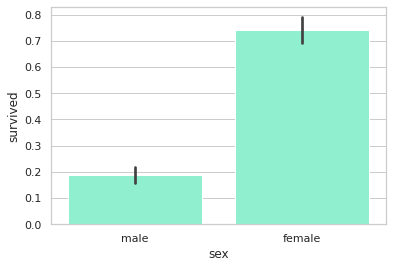

In [116]:
sns.barplot('sex', 'survived', data=train_df, color="aquamarine")
plt.show()

# **4. Logistic Regression and Results**

In [108]:
final_train.loc[final_train.survived == 1,'fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: fare, Length: 342, dtype: float64

In [110]:
final_train[final_train.survived==1]['fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: fare, Length: 342, dtype: float64